In [1]:
%load_ext autoreload
%autoreload 2
import os
os.chdir('../')

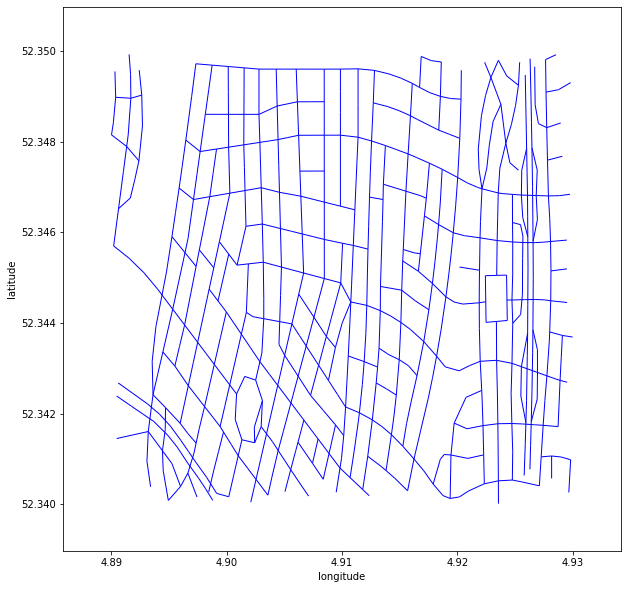

In [2]:
from models.histogram import HistogramDetector
from SHDataset import SHDataset
from utils import *
from metrics import *

bbox = (52.34, 52.35, 4.89, 4.93)
dataset = SHDataset(noise=True, noise_config=2)
G1,T1,G2,T2 = dataset.read_snapshots(0, bbox=bbox)

plot_graph(G1, figsize=(10,10))

### Results no noise

100%|██████████| 25254/25254 [00:17<00:00, 1484.43it/s]


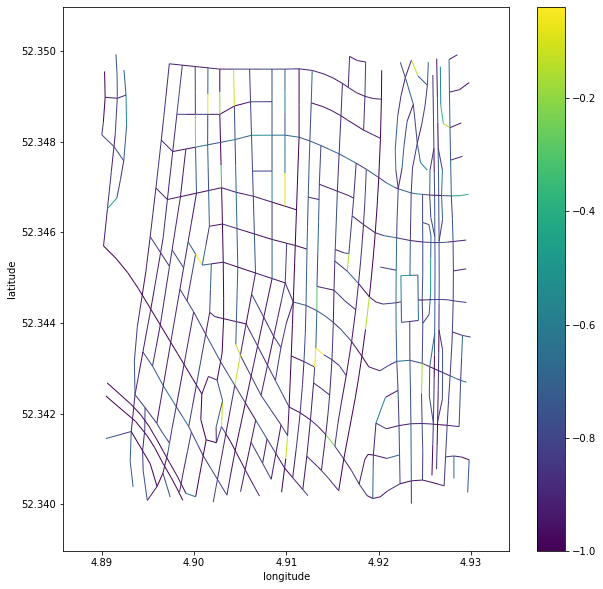

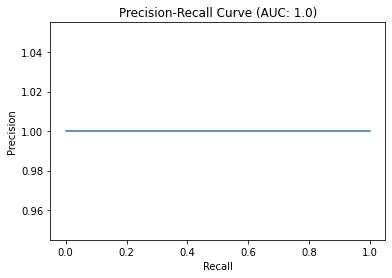

n: [293. 207. 151.  58.  13.   5.   3.   1.   8.  10.]
bins: [-1.         -0.9038961  -0.80779221 -0.71168831 -0.61558442 -0.51948052
 -0.42337662 -0.32727273 -0.23116883 -0.13506494 -0.03896104]
Possible thresholds: [(-0.32727272727272727, 1.0)]
Threshold: -0.32727272727272727
Fscore: 0.9743589743589743


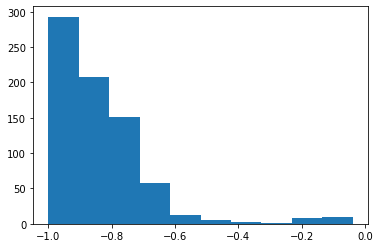

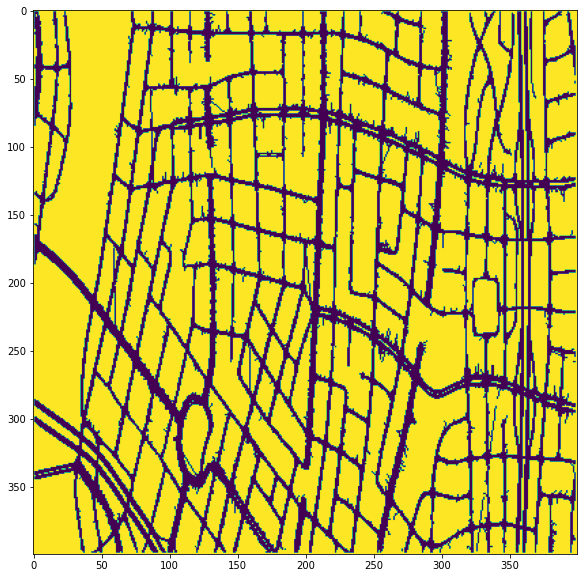

In [29]:
dataset = SHDataset(noise=False, noise_config=0)
G1,T1,G2,T2 = dataset.read_snapshots(0, bbox=bbox)

hist_det = HistogramDetector(G1, bbox, hist_dims=(400,400))
G2_pred_hist = hist_det.forward(T2['T'])
gt_labels = groundtruth_labels(G1, G2)
plot_graph(G2_pred_hist, use_weights=True, figsize=(10,10))
scores_hist = predicted_labels(G2_pred_hist)
p_hist, r_hist, ts_hist, pr_auc_hist = PRCurve(gt_labels, scores_hist, log_scale=False)
threshold_hist = hist_det.find_threshold()
print(f'Threshold: {threshold_hist}')
predictions_hist = {k: 0 if scores_hist[k] < threshold_hist else 1 for k in gt_labels}
fscore_hist = fscore(gt_labels, predictions_hist)
plt.figure(figsize=(10,10))
plt.imshow(np.rot90(hist_det.hist))
print(f'Fscore: {fscore_hist}')

### Results noise config 0

100%|██████████| 25301/25301 [00:16<00:00, 1492.60it/s]


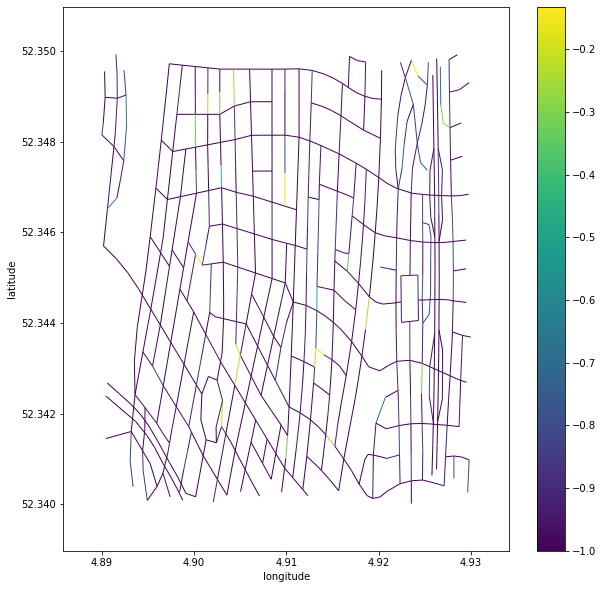

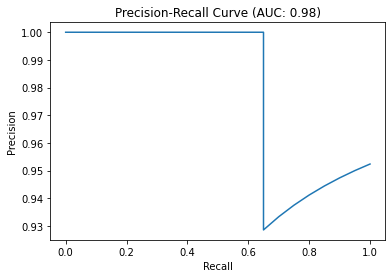

n: [633.  64.  26.   3.   2.   0.   2.   4.   7.   8.]
bins: [-1.         -0.91326531 -0.82653061 -0.73979592 -0.65306122 -0.56632653
 -0.47959184 -0.39285714 -0.30612245 -0.21938776 -0.13265306]
Possible thresholds: [(-0.5663265306122449, 0.0)]
Threshold: -0.5663265306122449
Fscore: 0.975609756097561


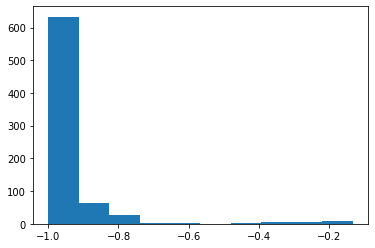

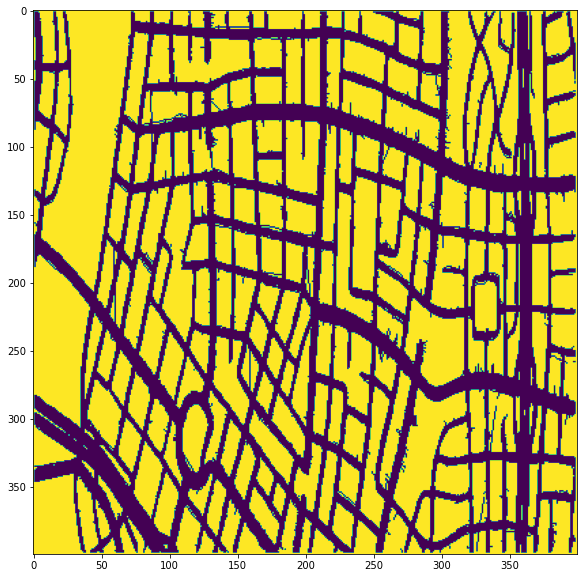

In [30]:
dataset = SHDataset(noise=True, noise_config=0)
G1,T1,G2,T2 = dataset.read_snapshots(0, bbox=bbox)

hist_det = HistogramDetector(G1, bbox, hist_dims=(400,400))
G2_pred_hist = hist_det.forward(T2['T'])
gt_labels = groundtruth_labels(G1, G2)
plot_graph(G2_pred_hist, use_weights=True, figsize=(10,10))
scores_hist = predicted_labels(G2_pred_hist)
p_hist, r_hist, ts_hist, pr_auc_hist = PRCurve(gt_labels, scores_hist, log_scale=False)
threshold_hist = hist_det.find_threshold()
print(f'Threshold: {threshold_hist}')
predictions_hist = {k: 0 if scores_hist[k] < threshold_hist else 1 for k in gt_labels}
fscore_hist = fscore(gt_labels, predictions_hist)
plt.figure(figsize=(10,10))
plt.imshow(np.rot90(hist_det.hist))
print(f'Fscore: {fscore_hist}')

### Results noise config 1

100%|██████████| 25445/25445 [00:17<00:00, 1470.46it/s]


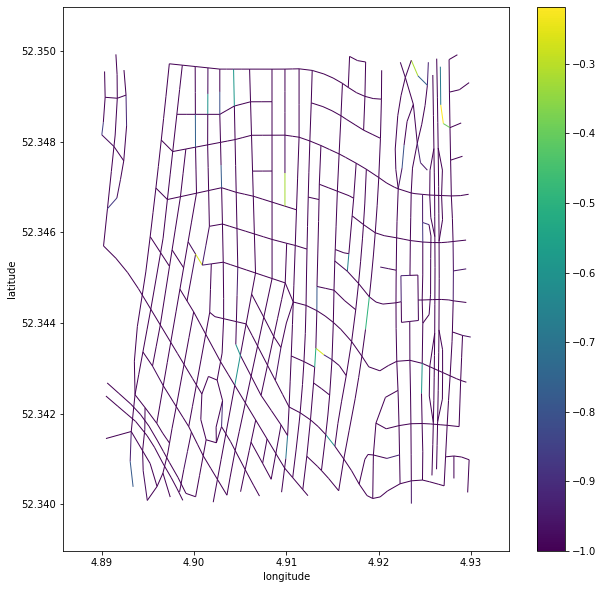

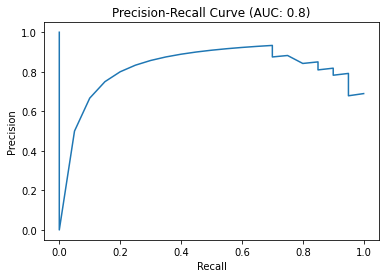

n: [718.   7.   5.   3.   3.   5.   2.   1.   2.   3.]
bins: [-1.         -0.92184874 -0.84369748 -0.76554622 -0.68739496 -0.6092437
 -0.53109244 -0.45294118 -0.37478992 -0.29663866 -0.21848739]
Possible thresholds: [(-0.7655462184873949, 3.0), (-0.6873949579831933, 3.0), (-0.4529411764705882, 1.0)]
Threshold: -0.7655462184873949
Fscore: 0.8205128205128205


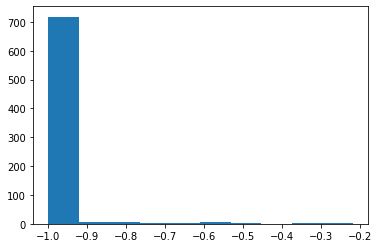

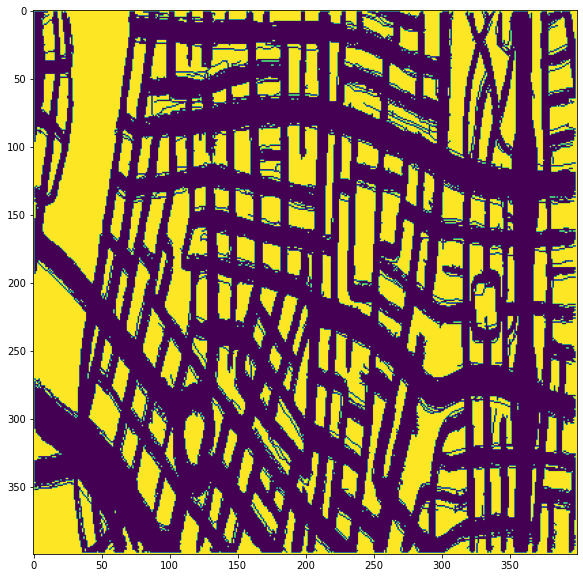

In [31]:
dataset = SHDataset(noise=True, noise_config=1)
G1,T1,G2,T2 = dataset.read_snapshots(0, bbox=bbox)

hist_det = HistogramDetector(G1, bbox, hist_dims=(400,400))
G2_pred_hist = hist_det.forward(T2['T'])
gt_labels = groundtruth_labels(G1, G2)
plot_graph(G2_pred_hist, use_weights=True, figsize=(10,10))
scores_hist = predicted_labels(G2_pred_hist)
p_hist, r_hist, ts_hist, pr_auc_hist = PRCurve(gt_labels, scores_hist, log_scale=False)
threshold_hist = hist_det.find_threshold()
print(f'Threshold: {threshold_hist}')
predictions_hist = {k: 0 if scores_hist[k] < threshold_hist else 1 for k in gt_labels}
fscore_hist = fscore(gt_labels, predictions_hist)
plt.figure(figsize=(10,10))
plt.imshow(np.rot90(hist_det.hist))
print(f'Fscore: {fscore_hist}')

Fscore: 0.8205128205128205


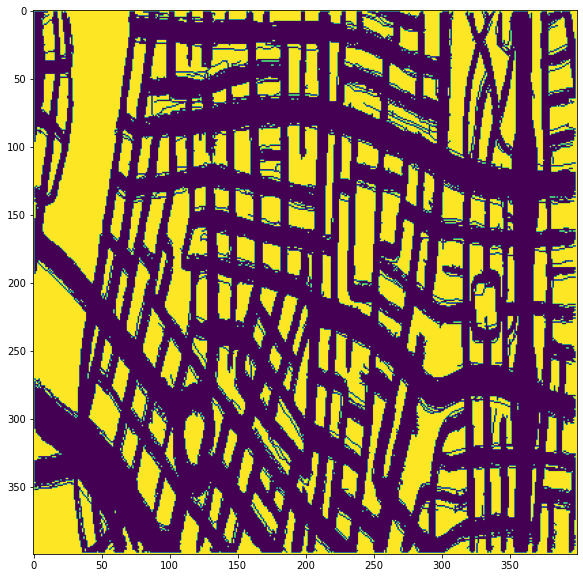

In [32]:
threshold_hist = -0.7655462184873949
predictions_hist = {k: 0 if scores_hist[k] < threshold_hist else 1 for k in gt_labels}
fscore_hist = fscore(gt_labels, predictions_hist)
plt.figure(figsize=(10,10))
plt.imshow(np.rot90(hist_det.hist))
print(f'Fscore: {fscore_hist}')

Fscore: 0.7777777777777777


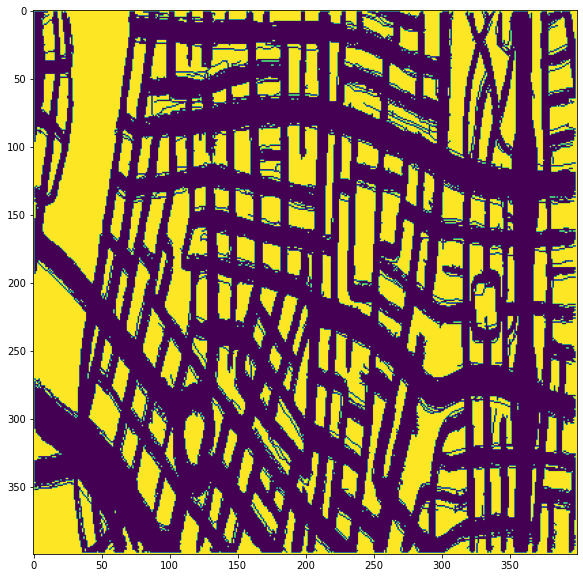

In [33]:
threshold_hist = -0.6873949579831933
predictions_hist = {k: 0 if scores_hist[k] < threshold_hist else 1 for k in gt_labels}
fscore_hist = fscore(gt_labels, predictions_hist)
plt.figure(figsize=(10,10))
plt.imshow(np.rot90(hist_det.hist))
print(f'Fscore: {fscore_hist}')

### Results noise config 2

100%|██████████| 25675/25675 [00:16<00:00, 1514.77it/s]


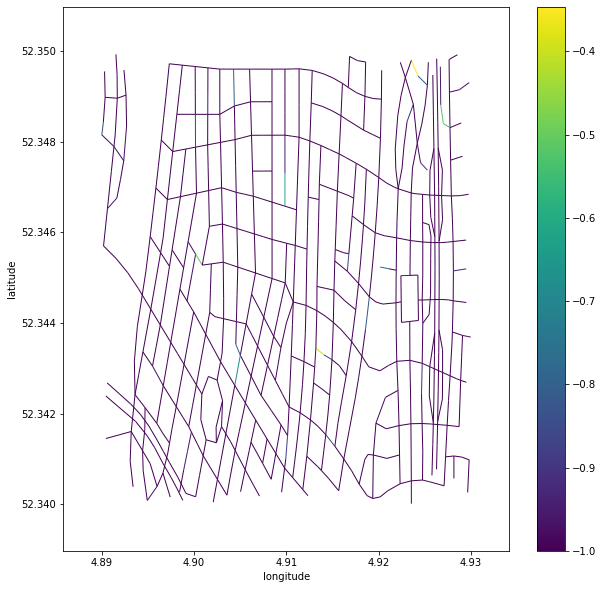

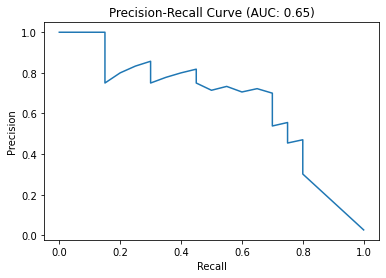

n: [727.   7.   5.   3.   1.   0.   1.   3.   0.   2.]
bins: [-1.         -0.93469388 -0.86938776 -0.80408163 -0.73877551 -0.67346939
 -0.60816327 -0.54285714 -0.47755102 -0.4122449  -0.34693878]
Possible thresholds: [(-0.673469387755102, 0.0), (-0.4775510204081632, 0.0)]
Threshold: -0.673469387755102
Fscore: 0.3846153846153846


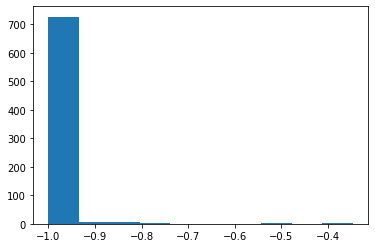

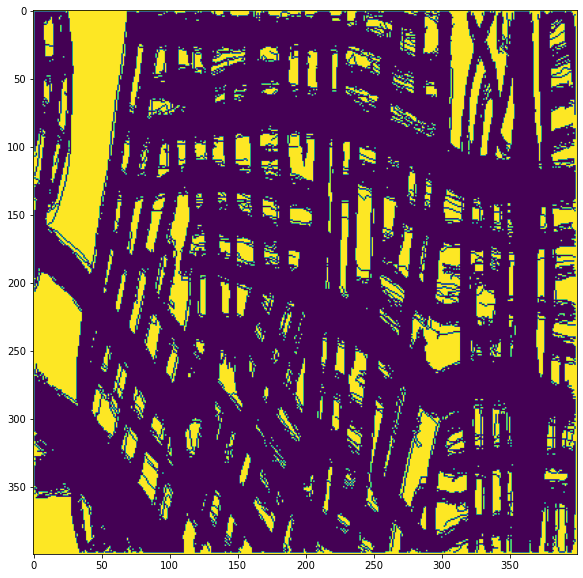

In [34]:
dataset = SHDataset(noise=True, noise_config=2)
G1,T1,G2,T2 = dataset.read_snapshots(0, bbox=bbox)

hist_det = HistogramDetector(G1, bbox, hist_dims=(400,400))
G2_pred_hist = hist_det.forward(T2['T'])
gt_labels = groundtruth_labels(G1, G2)
plot_graph(G2_pred_hist, use_weights=True, figsize=(10,10))
scores_hist = predicted_labels(G2_pred_hist)
p_hist, r_hist, ts_hist, pr_auc_hist = PRCurve(gt_labels, scores_hist, log_scale=False)
threshold_hist = hist_det.find_threshold()
print(f'Threshold: {threshold_hist}')
predictions_hist = {k: 0 if scores_hist[k] < threshold_hist else 1 for k in gt_labels}
fscore_hist = fscore(gt_labels, predictions_hist)
plt.figure(figsize=(10,10))
plt.imshow(np.rot90(hist_det.hist))
print(f'Fscore: {fscore_hist}')

### Results noise config 3

100%|██████████| 25958/25958 [00:19<00:00, 1350.89it/s]


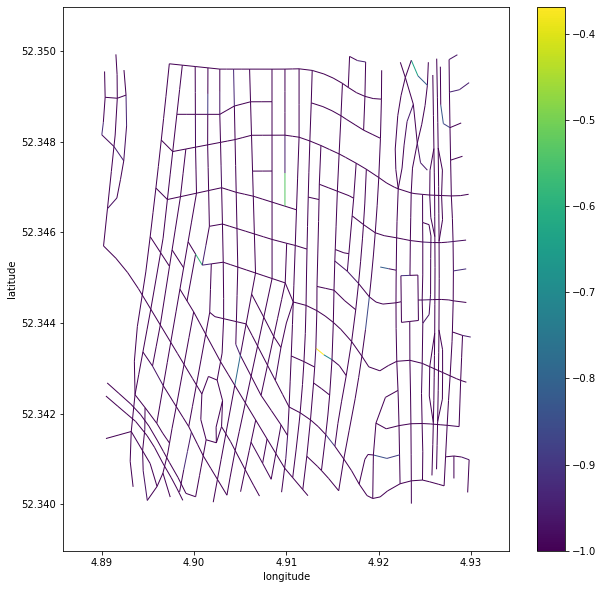

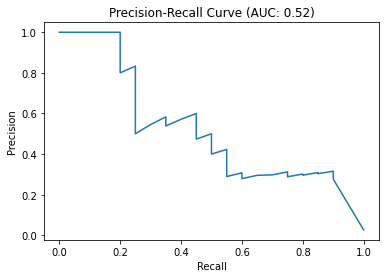

n: [728.   9.   6.   1.   1.   1.   1.   1.   0.   1.]
bins: [-1.         -0.93690476 -0.87380952 -0.81071429 -0.74761905 -0.68452381
 -0.62142857 -0.55833333 -0.4952381  -0.43214286 -0.36904762]
Possible thresholds: [(-0.8107142857142857, 1.0), (-0.49523809523809526, 0.0)]
Threshold: -0.8107142857142857
Fscore: 0.3846153846153846


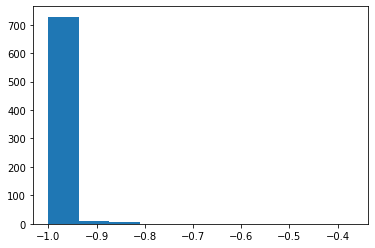

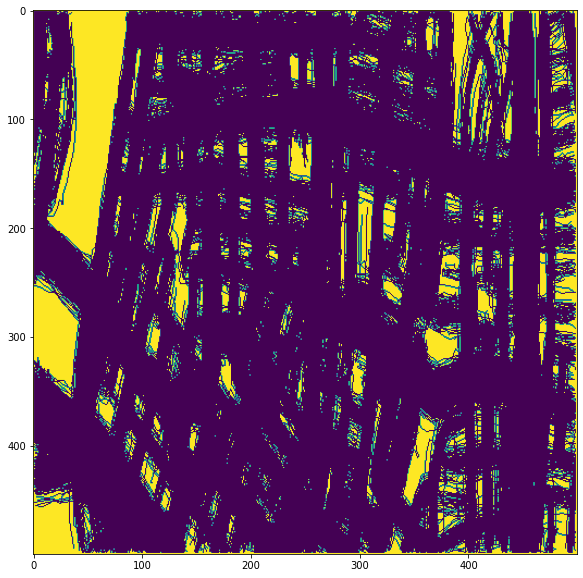

In [37]:
dataset = SHDataset(noise=True, noise_config=3)
G1,T1,G2,T2 = dataset.read_snapshots(0, bbox=bbox)

hist_det = HistogramDetector(G1, bbox, hist_dims=(500,500))
G2_pred_hist = hist_det.forward(T2['T'])
gt_labels = groundtruth_labels(G1, G2)
plot_graph(G2_pred_hist, use_weights=True, figsize=(10,10))
scores_hist = predicted_labels(G2_pred_hist)
p_hist, r_hist, ts_hist, pr_auc_hist = PRCurve(gt_labels, scores_hist, log_scale=False)
threshold_hist = hist_det.find_threshold()
print(f'Threshold: {threshold_hist}')
predictions_hist = {k: 0 if scores_hist[k] < threshold_hist else 1 for k in gt_labels}
fscore_hist = fscore(gt_labels, predictions_hist)
plt.figure(figsize=(10,10))
plt.imshow(np.rot90(hist_det.hist))
print(f'Fscore: {fscore_hist}')

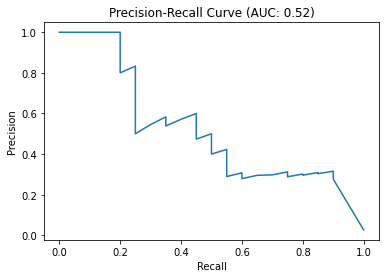

Threshold: -0.8
Fscore: 0.3846153846153846


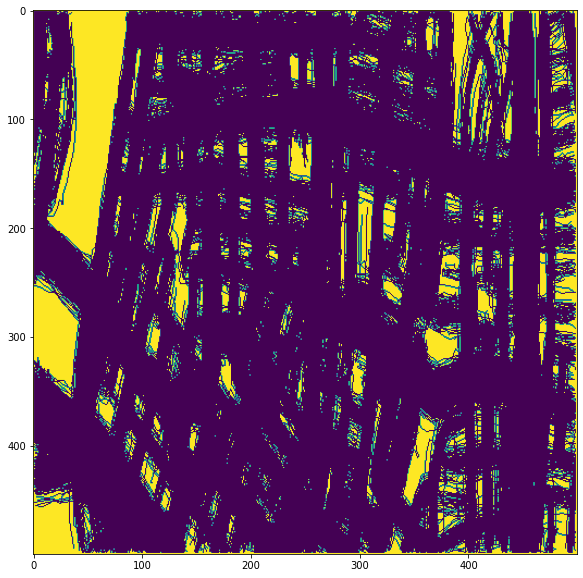

In [38]:

p_hist, r_hist, ts_hist, pr_auc_hist = PRCurve(gt_labels, scores_hist, log_scale=False)
# threshold_hist = hist_det.find_threshold()
threshold_hist = -.8
print(f'Threshold: {threshold_hist}')
predictions_hist = {k: 0 if scores_hist[k] < threshold_hist else 1 for k in gt_labels}
fscore_hist = fscore(gt_labels, predictions_hist)
plt.figure(figsize=(10,10))
plt.imshow(np.rot90(hist_det.hist))
print(f'Fscore: {fscore_hist}')